In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings("ignore")


In [2]:

# # Load the dataset

# df1 = pd.read_csv("/content/final_test.csv")
# df2 = pd.read_csv("/content/Clothing Size Survey.csv")


In [3]:
# # Concatenate the two DataFrames along the rows axis (vertically stacking them)
# df = pd.concat([df1, df2])

In [4]:
# df.to_csv('df.csv')


In [5]:
df = pd.read_csv("/content/final_test_2.csv")


In [6]:
df

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119914,55,41.0,158.00,M
119915,70,52.0,165.00,XL
119916,92,61.0,178.00,XXL
119917,15,5.0,100.00,XXXL


In [7]:
df['size'] = df['size'].replace('XXS', 'XS')


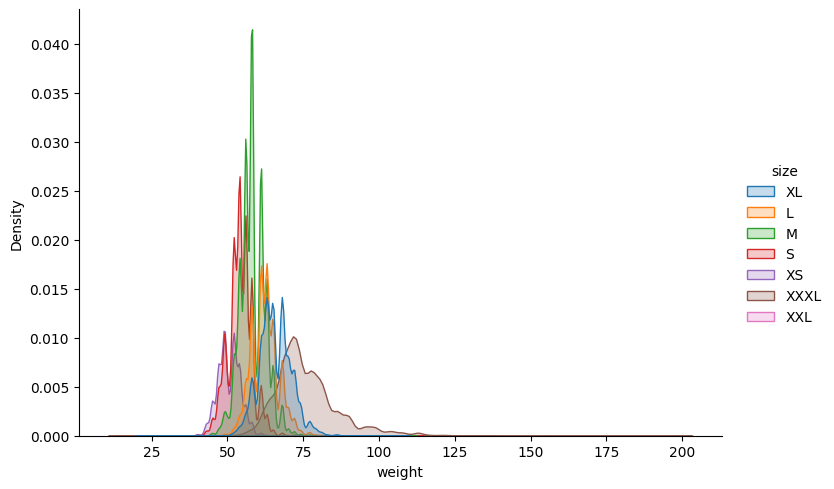

In [8]:

sns.displot(df, x="weight", hue="size", kind="kde", fill=True , height=5, aspect=1.5)


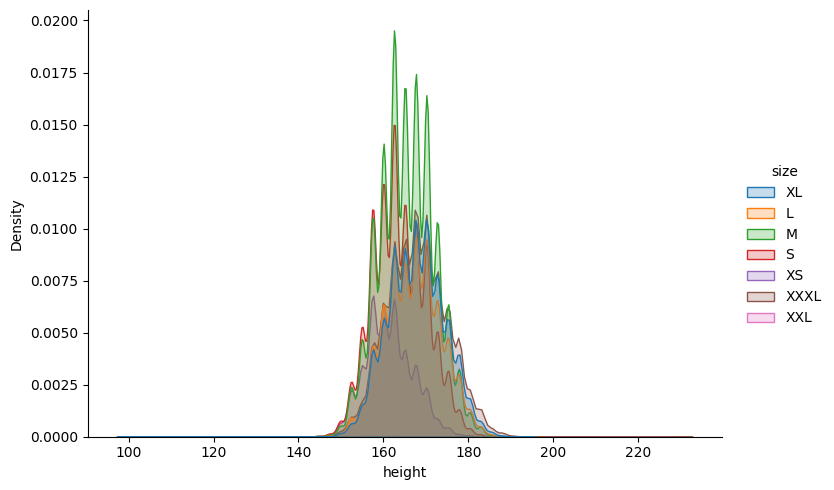

In [9]:
sns.displot(df, x="height", hue="size", kind="kde", fill=True , height=5, aspect=1.5)



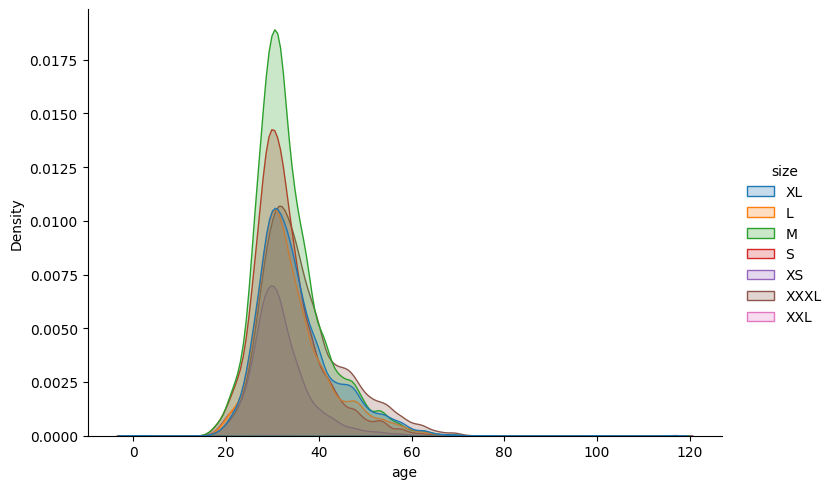

In [10]:

sns.displot(df, x="age", hue="size", kind="kde", fill=True , height=5, aspect=1.5)

In [11]:
df['weight'].describe()

count    119919.000000
mean         61.772213
std           9.980826
min          15.000000
25%          55.000000
50%          61.000000
75%          67.000000
max         199.000000
Name: weight, dtype: float64

In [12]:
df.head(20)

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
5,50,27.0,160.02,S
6,53,65.0,160.02,M
7,51,33.0,160.02,XS
8,54,26.0,167.64,M
9,53,32.0,165.10,S


In [13]:
df.isnull().sum()


weight      0
age       257
height    330
size        0
dtype: int64

In [14]:
df.describe()


,weight,age,height
count,119919.000000,119662.000000,119589.000000
mean,61.772213,34.012243,165.809632
std,9.980826,8.160997,6.766011
min,15.000000,0.000000,100.000000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,199.000000,117.000000,230.000000


In [15]:
# drop where size is XXXL and weight is less than 80
df = df.drop(df[(df['size'] == 'XXXL') & (df['weight'] < 80)].index)
# drop where size is XXL and weight is less than 70
df = df.drop(df[(df['size'] == 'XXL') & (df['weight'] < 70)].index)
# drop where size is XL and weight is less than 60
df = df.drop(df[(df['size'] == 'XL') & (df['weight'] < 60)].index)
# drop where size is xxs and weight is greater than 60
df = df.drop(df[(df['size'] == 'XXS') & (df['weight'] > 60)].index)
# drop where size is xs and weight is greater than 70
df = df.drop(df[(df['size'] == 'XS') & (df['weight'] > 70)].index)
# drop where size is s and weight is greater than 80
df = df.drop(df[(df['size'] == 'S') & (df['weight'] > 80)].index)


df.describe()




,weight,age,height
count,102031.000000,101808.000000,101747.000000
mean,60.491449,33.511011,165.653575
std,9.876916,7.818476,6.723339
min,22.000000,0.000000,100.000000
25%,54.000000,29.000000,160.020000
50%,58.000000,32.000000,165.100000
75%,64.000000,37.000000,170.180000
max,199.000000,117.000000,230.000000


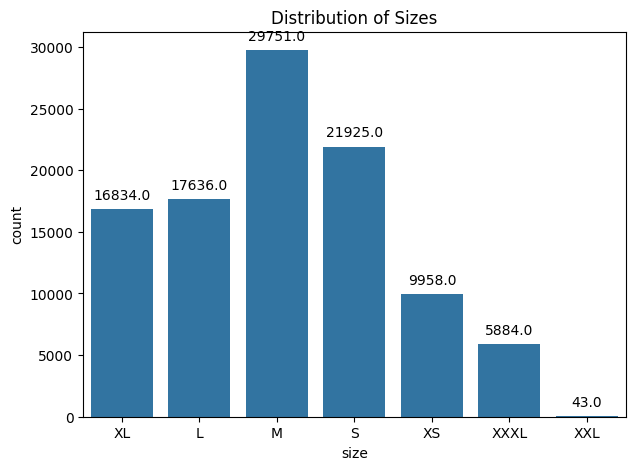

In [16]:
# Distribution of the target variable 'size' with count annotations
plt.figure(figsize=(7, 5))
sns.countplot(x='size', data=df)
plt.title('Distribution of Sizes')

# Annotate each bar with its count
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


Resampled dataset shape Counter({'XL': 4861, 'L': 4861, 'M': 4861, 'S': 4861, 'XS': 4861, 'XXXL': 4861, 'XXL': 4861})


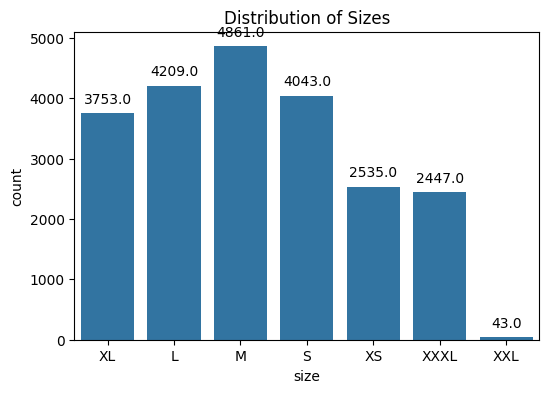

In [17]:
# generate artificial data to balance the dataset for the target variable 'size'
from imblearn.over_sampling import SMOTE
from collections import Counter
# weight	age	height	size
sm = SMOTE(random_state=42, sampling_strategy='all')
# remove null values
df = df.dropna()
# drop duplicates
df = df.drop_duplicates()

# resample the dataset with max value of 10000
X_res, y_res = sm.fit_resample(df[['weight','age','height']], df['size'])

# add the target variable 'size' to the resampled dataset
X_res['size'] = y_res


print('Resampled dataset shape %s' % Counter(y_res))

# Distribution of the target variable 'size' with count annotations
plt.figure(figsize=(6, 4))
sns.countplot(x='size', data=df)
plt.title('Distribution of Sizes')

# Annotate each bar with its count
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()




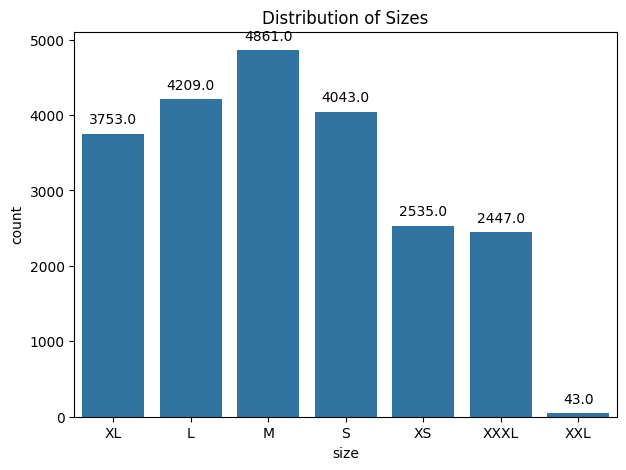

In [18]:
# Distribution of the target variable 'size' with count annotations
plt.figure(figsize=(7, 5))
sns.countplot(x='size', data=df)
plt.title('Distribution of Sizes')

# Annotate each bar with its count
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()



In [19]:
df.describe()

,weight,age,height
count,21891.000000,21891.000000,21891.000000
mean,62.954273,35.527112,165.836209
std,13.416012,10.540272,8.201134
min,22.000000,0.000000,100.000000
25%,54.000000,28.000000,160.020000
50%,61.000000,34.000000,165.100000
75%,68.000000,42.000000,172.720000
max,199.000000,117.000000,230.000000


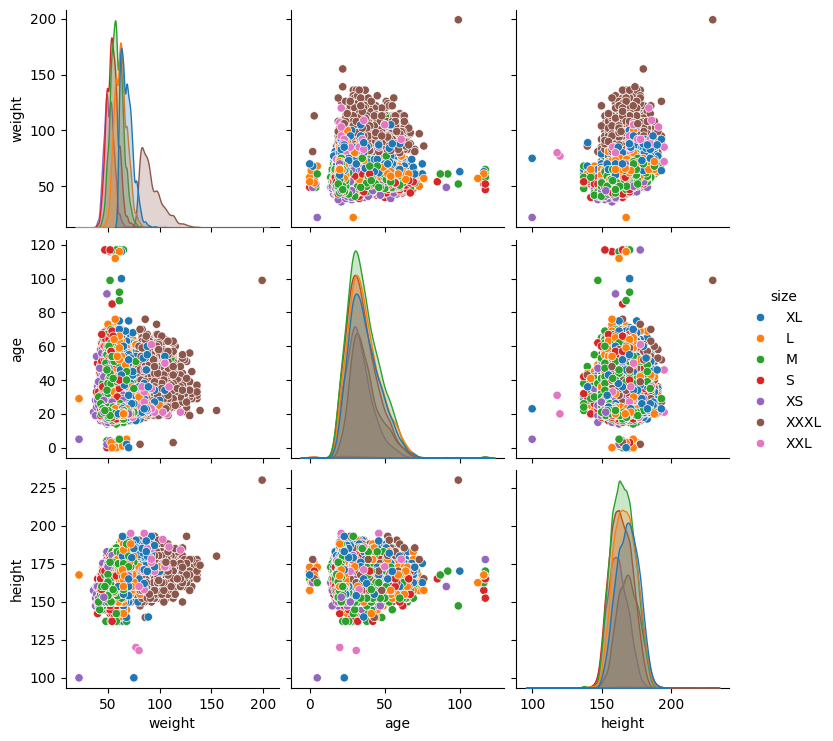

In [20]:
#distrpution of each column

# sns.pairplot(df[['weight', 'age', 'height', 'size']])
sns.pairplot(df[['weight', 'age', 'height', 'size']], hue='size')
plt.show()

In [21]:
X_res


,weight,age,height,size
0,62,28.000000,172.72000,XL
1,59,36.000000,167.64000,L
2,61,34.000000,165.10000,M
3,65,27.000000,175.26000,L
4,62,45.000000,172.72000,M
...,...,...,...,...
34022,97,41.626457,167.64000,XXXL
34023,106,19.287327,170.90981,XXXL
34024,81,42.559492,165.10000,XXXL
34025,89,40.331998,165.10000,XXXL


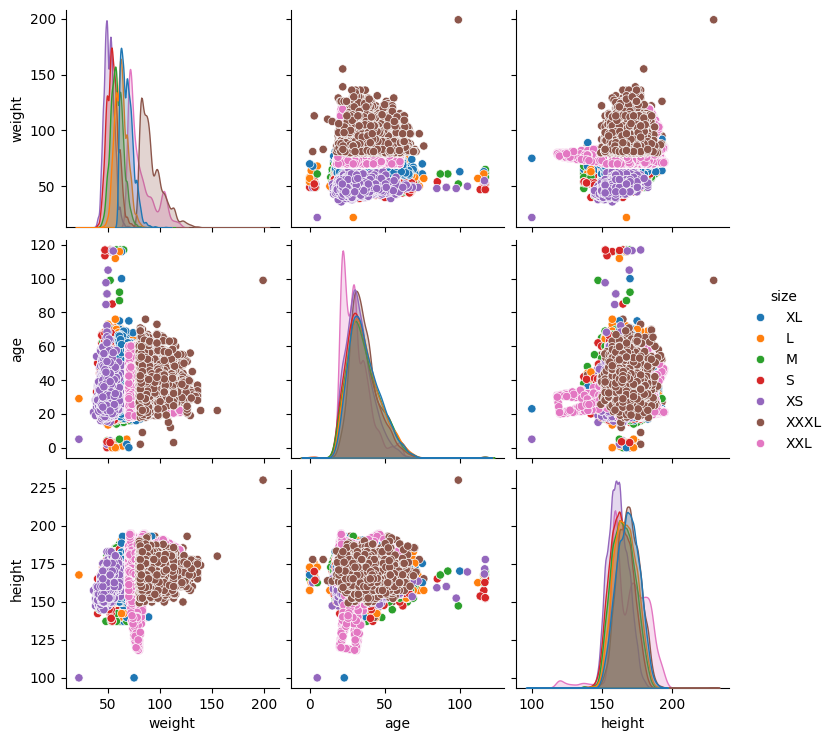

In [22]:
#distrpution of each column
# sns.pairplot(X_res[['weight', 'age', 'height', 'size']])
sns.pairplot(X_res[['weight', 'age', 'height', 'size']], hue='size')

plt.show()

In [23]:
df = X_res

In [24]:
len(df)

34027

In [25]:

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

weight    0
age       0
height    0
size      0
dtype: int64


In [26]:
#replace missing values with mean
df['age'].fillna(df['age'].mean(), inplace=True)
df['height'].fillna(df['height'].mean(), inplace=True)


In [27]:
df.dtypes

weight      int64
age       float64
height    float64
size       object
dtype: object

In [28]:


# Identify object columns
object_columns = df.select_dtypes(include=['object']).columns

# Convert object columns to category
df[object_columns] = df[object_columns].astype('category')



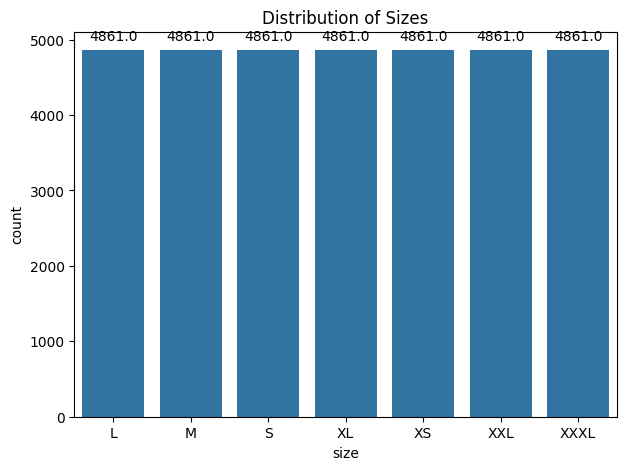

In [29]:
# Distribution of the target variable 'size' with count annotations
plt.figure(figsize=(7,5))
sns.countplot(x='size', data=df)
plt.title('Distribution of Sizes')

# Annotate each bar with its count
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34027 entries, 0 to 34026
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   weight  34027 non-null  int64   
 1   age     34027 non-null  float64 
 2   height  34027 non-null  float64 
 3   size    34027 non-null  category
dtypes: category(1), float64(2), int64(1)
memory usage: 831.2 KB


In [33]:
 df['size'] = df['size'].astype('object')

In [34]:
df.dtypes

weight      int64
age       float64
height    float64
size       object
dtype: object

In [35]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


weight    0
age       0
height    0
size      0
dtype: int64

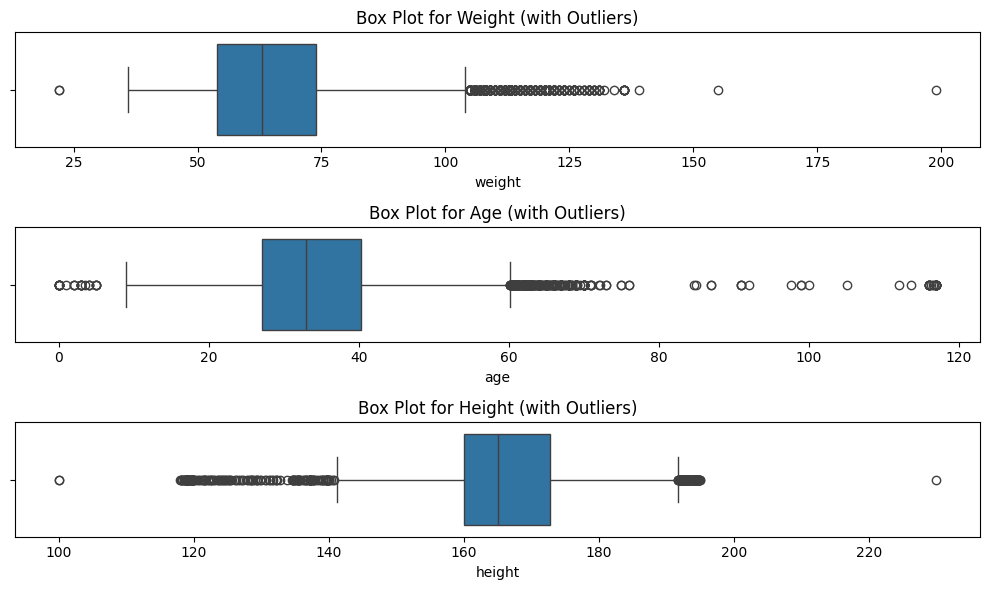

In [36]:
# Visualize outliers using box plots for all numerical features
plt.figure(figsize=(10,6))
# Box plot for 'weight'
plt.subplot(3, 1, 1)
sns.boxplot(x=df['weight'])
plt.title('Box Plot for Weight (with Outliers)')

# Box plot for 'age'
plt.subplot(3, 1, 2)
sns.boxplot(x=df['age'])
plt.title('Box Plot for Age (with Outliers)')

# Box plot for 'height'
plt.subplot(3, 1, 3)
sns.boxplot(x=df['height'])
plt.title('Box Plot for Height (with Outliers)')
plt.tight_layout()
plt.show()



In [37]:

# Dealing with the outliers in the 'age' column

# Get the first quartile (Q1) and third quartile (Q3)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Replace outliers with upper and lower bounds
df['age'] = df['age'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


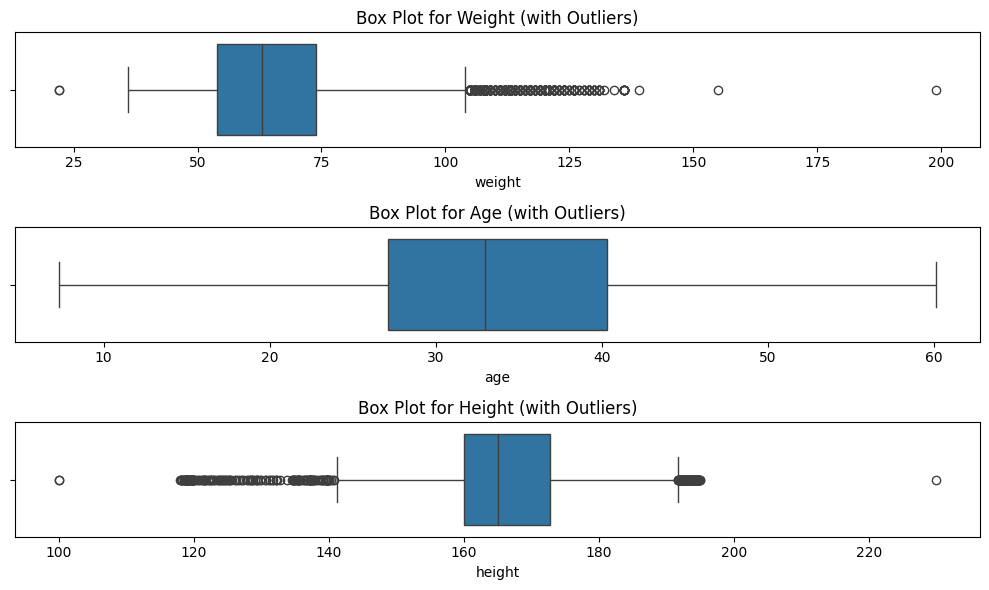

In [38]:
# Visualize outliers using box plots for all numerical features
plt.figure(figsize=(10,6))

# Box plot for 'weight'
plt.subplot(3, 1, 1)
sns.boxplot(x=df['weight'])
plt.title('Box Plot for Weight (with Outliers)')

# Box plot for 'age'
plt.subplot(3, 1, 2)
sns.boxplot(x=df['age'])
plt.title('Box Plot for Age (with Outliers)')

# Box plot for 'height'
plt.subplot(3, 1, 3)
sns.boxplot(x=df['height'])
plt.title('Box Plot for Height (with Outliers)')

plt.tight_layout()
plt.show()

In [39]:
df['weight'].describe()

count    34027.000000
mean        66.690452
std         16.050005
min         22.000000
25%         54.000000
50%         63.000000
75%         74.000000
max        199.000000
Name: weight, dtype: float64

DataFrame with BMI Column:
    weight   age  height size        bmi
0      62  28.0  172.72   XL  20.782914
1      59  36.0  167.64    L  20.994073
2      61  34.0  165.10    M  22.378743
3      65  27.0  175.26    L  21.161563
4      62  45.0  172.72    M  20.782914


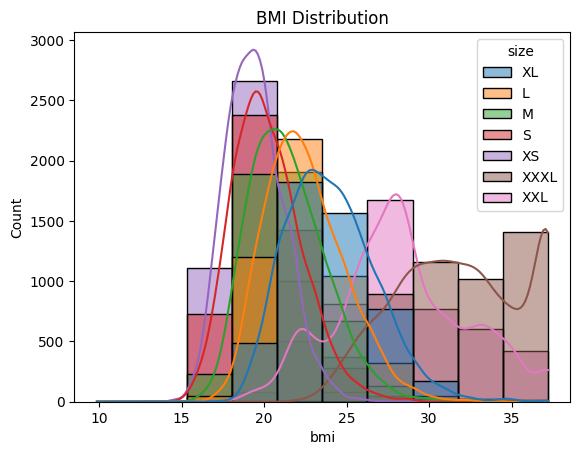

In [40]:
# Calculate BMI
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Display the DataFrame with the new 'bmi' column
print("DataFrame with BMI Column:\n", df.head())

# remove bmi outliers using IQR
# Get the first quartile (Q1) and third quartile (Q3)
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Replace outliers with upper and lower bounds
df['bmi'] = df['bmi'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Visualize bmi histogram with size as hue
sns.histplot(data=df, x='bmi', hue='size', kde=True, bins=10)
plt.title('BMI Distribution')
plt.show()

# df_new = df.copy()
# # if bmi is less than 18.5, then size is XS
# df_new.loc[df_new['bmi'] < 18.5, 'size'] = 'XS'


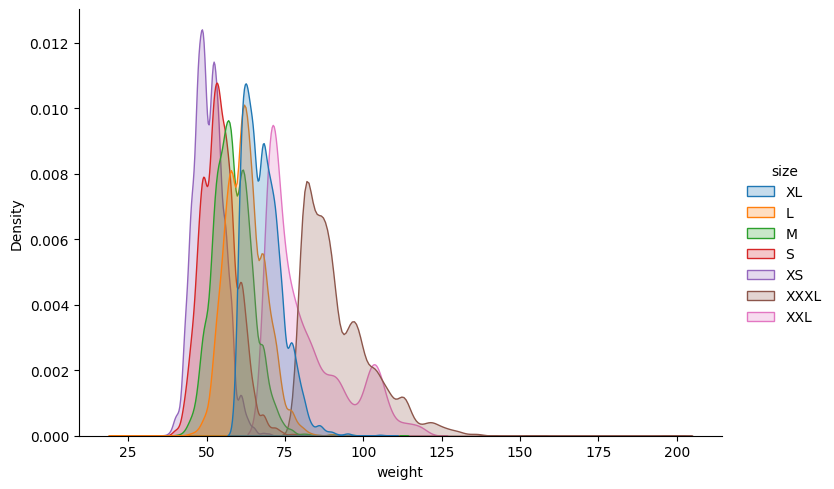

In [41]:
# Visualize weight histogram with size as hue with large figure size
sns.displot(df, x="weight", hue="size", kind="kde", fill=True , height=5, aspect=1.5)

In [42]:
# Correlation matrix for bmi
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'XL'

#**feature extraction after bmi**

In [ ]:
# # Assuming 'df' is your DataFrame with columns 'weight', 'height', and other relevant features

# # Calculate neck circumference (example formula)
# df['neck_circumference'] = 0.2 * df['height'] + 0.1 * df['weight']

# # Calculate waist circumference (example formula)
# df['waist_circumference'] = 0.5 * df['height'] + 0.2 * df['weight']

# # Display the DataFrame with new features
# print("DataFrame with Neck and Waist Circumference:\n", df.head())


In [ ]:

# # Assuming 'df' is your DataFrame with columns 'weight', 'height', 'waist_circumference', 'shoulder_circumference', 'torso_length', 'age', 'gender'


# # Calculate Waist-to-Hip Ratio (WHR)
# # Estimate hip_circumference if not available
# df['hip_circumference'] = 0.85 * df['waist_circumference']
# df['whr'] = df['waist_circumference'] / df['hip_circumference']

# # Estimate shoulder_circumference if not available
# df['shoulder_circumference'] = 0.2 * df['height'] + 0.1 * df['weight']

# # Calculate Shoulder-to-Waist Ratio
# df['shoulder_to_waist_ratio'] = df['shoulder_circumference'] / df['waist_circumference']

# # Estimate torso_length if not available
# df['torso_length'] = 0.45 * df['height']
# # Calculate Leg Length
# df['leg_length'] = df['height'] - df['torso_length']

# # Display the DataFrame with new features
# print("DataFrame with Additional Features:\n", df.head())
df

#**normalization and encoding**



In [43]:
#normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# df[['weight', 'age', 'height','neck_circumference','waist_circumference','bmi',	'hip_circumference',	'whr',	'shoulder_circumference',	'shoulder_to_waist_ratio',	'torso_length',	'leg_length']] = scaler.fit_transform(df[['weight', 'age', 'height','neck_circumference','bmi',	'waist_circumference',	'hip_circumference',	'whr',	'shoulder_circumference',	'shoulder_to_waist_ratio',	'torso_length',	'leg_length']])
df[['weight', 'age', 'height','bmi']] = scaler.fit_transform(df[['weight', 'age', 'height', 'bmi']])


In [44]:

# Encoding the target variable 'size'
size_mapping = {'XXS': 1, 'S': 2, 'M': 3, 'L': 4, 'XL': 5, 'XXL': 6, 'XXXL': 7}
df['size'] = df['size'].map(size_mapping)

# df_encoded = df[['weight', 'age', 'height','neck_circumference','bmi',	'waist_circumference',	'hip_circumference',	'whr',	'shoulder_circumference',	'shoulder_to_waist_ratio',	'torso_length',	'leg_length','size']]
df_encoded = df[['weight', 'age', 'height','bmi','size']]
df=df_encoded
df

,weight,age,height,bmi,size
0,0.225989,0.391721,0.559385,0.399525,5.0
1,0.209040,0.543074,0.520308,0.407250,4.0
2,0.220339,0.505235,0.500769,0.457905,3.0
3,0.242938,0.372802,0.578923,0.413377,4.0
4,0.225989,0.713345,0.559385,0.399525,3.0
...,...,...,...,...,...
34022,0.423729,0.649521,0.520308,0.901903,7.0
34023,0.474576,0.226885,0.545460,0.966765,7.0
34024,0.333333,0.667173,0.500769,0.726320,7.0
34025,0.378531,0.625031,0.500769,0.833687,7.0


In [45]:
columns = df.columns.to_list()
columns.append(columns.pop(columns.index("size")))
df = df[columns]
df

,weight,age,height,bmi,size
0,0.225989,0.391721,0.559385,0.399525,5.0
1,0.209040,0.543074,0.520308,0.407250,4.0
2,0.220339,0.505235,0.500769,0.457905,3.0
3,0.242938,0.372802,0.578923,0.413377,4.0
4,0.225989,0.713345,0.559385,0.399525,3.0
...,...,...,...,...,...
34022,0.423729,0.649521,0.520308,0.901903,7.0
34023,0.474576,0.226885,0.545460,0.966765,7.0
34024,0.333333,0.667173,0.500769,0.726320,7.0
34025,0.378531,0.625031,0.500769,0.833687,7.0


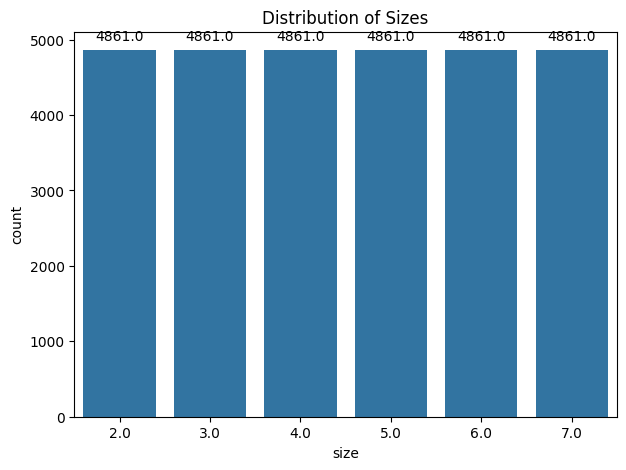

In [46]:
# Distribution of the target variable 'size' with count annotations
plt.figure(figsize=(7, 5))
sns.countplot(x='size', data=df)
plt.title('Distribution of Sizes')

# Annotate each bar with its count
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [ ]:

# X = df.drop('size', axis=1)
# y = df['size']

# # Split the data into training and testing sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X = df.drop(columns=['size'])  # Features
y = df['size']  # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (27221, 4)
X_test shape: (6806, 4)
y_train shape: (27221,)
y_test shape: (6806,)


In [ ]:
#  df.isna().sum()

In [ ]:
df

In [ ]:
# import pandas as pd

# # Check for missing values in y_train
# missing_values = pd.isna(y_train)

# # Print the indices of the rows with missing values
# print(y_train[missing_values].index)

In [ ]:
# # Remove rows with missing values
# y_train = y_train.dropna()



In [48]:
# Check for NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
print("Indices of NaN values in y_train:", nan_indices)

# Remove rows with NaN values from X_train and y_train
X_train = X_train.drop(index=nan_indices)
y_train = y_train.drop(index=nan_indices)


Indices of NaN values in y_train: Index([24893, 26722, 21501, 24605, 26473, 25209, 10388, 24709, 25450, 24643,
       ...
       21271, 25851, 26557,  1021,  3943, 26531, 19118, 25658, 16023, 15795],
      dtype='int64', length=3896)


# **linear regression model**


In [ ]:
# # linear regression model
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score
# from sklearn.model_selection import cross_val_score
# import numpy as np

# # Instantiate the model
# lin_reg = LinearRegression()

# # Fit the model
# lin_reg.fit(X_train, y_train)

# # Predict on the test set
# y_pred = lin_reg.predict(X_test)

# # Calculate MSE and R^2
# mse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# # Print the metrics
# print("MSE:", mse)
# print("R^2:", r2)

# # Perform 5-fold cross validation
# scores = cross_val_score(lin_reg, X, y, cv=5)
# print("Cross-validated scores:", scores)

# # Get a random sample index
# random_index = X_test.sample().index[0]

# # Print the random sample
# print(X_test.loc[random_index])

# # Print the corresponding label
# print(y_test.loc[random_index])

# # Make predictions on the random sample using the best voting regressor
# print(lin_reg.predict([X_test.loc[random_index]]))


In [ ]:
# # Check for NaN values in y_pred and y_test
# nan_indices_pred = np.isnan(y_pred)
# nan_indices_test = y_test.index[np.isnan(y_test)]

# if np.any(nan_indices_pred) or len(nan_indices_test) > 0:
#     print("NaN values found in predictions or test labels. Handling...")

#     # Remove rows with NaN values from y_pred and y_test
#     y_pred_clean = y_pred[~nan_indices_pred]
#     y_test_clean = y_test.drop(index=nan_indices_test)

#     # Ensure the number of samples matches
#     y_pred_clean = y_pred_clean[:len(y_test_clean)]

#     # Calculate MSE and R^2 again
#     mse = np.sqrt(mean_squared_error(y_test_clean, y_pred_clean))
#     r2 = r2_score(y_test_clean, y_pred_clean)

#     # Print the metrics
#     print("MSE (cleaned):", mse)
#     print("R^2 (cleaned):", r2)

# else:
#     # If no NaN values found, print the metrics as before
#     print("MSE:", mse)
#     print("R^2:", r2)


In [ ]:
# #lin_reg
# import matplotlib.pyplot as plt
# import numpy as np
# # Generate a random index from the test set
# random_index = np.random.choice(len(X_test))

# # Define the size range from XXS to XXXL
# sizes = np.arange(0, 7)
# sizes_labels = [ 'XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL']

# # Predicted value
# predicted_value = lin_reg.predict([X_test.iloc[random_index]])[0]
# true_value = y_test.iloc[random_index]

# # Create a colormap for the heatmap
# cmap = plt.get_cmap('Blues')

# # Plot the line heatmap
# plt.figure(figsize=(8, 4))

# # Add a heatmap background
# heatmap = plt.imshow([np.arange(0, 7)], cmap=cmap, aspect='auto', extent=[sizes[0] - 0.5, sizes[-1] + 0.5, 0, 1], alpha=0.6)

# # add the predicted value as a vertical line
# plt.axvline(predicted_value, color='k', linestyle='-', linewidth=1)

# # add the true value as a vertical line
# plt.axvline(true_value, color='r', linestyle='-', linewidth=1)

# # Customize the plot
# plt.xticks(sizes, sizes_labels)
# plt.yticks([])
# plt.xlabel('Sizes (XXS to XXXL)')
# plt.title('Line Heatmap with Predicted Value (Random Test Sample)')
# plt.legend(['Predicted Value', 'True Value'])

# # Show the colorbar for the heatmap
# cbar = plt.colorbar(heatmap)
# cbar.set_label('Intensity')

# # Display the plot
# plt.show()


In [ ]:
# #size recommendation for linear regression
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

# # Function to calculate BMI
# def calculate_bmi(weight, height):
#     return weight / ((height / 100) ** 2)

# # Function to normalize user input
# def normalize_input(user_input, scaler):
#     normalized_input = scaler.transform(user_input.reshape(1, -1))
#     return normalized_input

# # Function to predict size and provide recommendations
# def predict_size_and_recommend(user_input, lin_reg, scaler, size_mapping):
#     # Calculate BMI
#     bmi = calculate_bmi(user_input[0], user_input[2])

#     # Add BMI to user input
#     user_input_with_bmi = np.append(user_input, bmi)
#     print(user_input_with_bmi)

#     # Normalize input
#     normalized_input = normalize_input(user_input_with_bmi, scaler)
#     print(normalized_input)
#     # Predict size
#     predicted_size = lin_reg.predict(normalized_input)[0]
#     print(predicted_size)
#     # Map predicted size to category
#     for size, encoded_size in size_mapping.items():
#         if encoded_size == predicted_size:
#             predicted_size_category = size
#             break
#     else:
#         # Handle the case when predicted size is not in the categories
#         # Find the two sizes between which the predicted size falls
#         sizes = list(size_mapping.keys())
#         sizes.sort(key=lambda s: size_mapping[s])

#         for i in range(len(sizes) - 1):
#             if size_mapping[sizes[i]] < predicted_size < size_mapping[sizes[i+1]]:
#                 recommended_sizes = [sizes[i], sizes[i+1]]
#                 break
#         else:
#             # Edge case if the predicted size is greater than the biggest size
#             recommended_sizes = [sizes[5], sizes[6]]

#         return f"The predicted size is not in the defined categories. Recommended sizes: {', '.join(recommended_sizes)}"

#     return f"Predicted size: {predicted_size_category}"

# # User input
# age = float(input("Enter age: "))
# weight = float(input("Enter weight (kg): "))
# height = float(input("Enter height (cm): "))

# # Create user input array
# user_input = np.array([weight, age, height])

# # Load the trained Linear Regression model and MinMaxScaler
# # (Assuming 'lin_reg', 'scaler', and 'size_mapping' are already defined)

# # Predict size and provide recommendations
# result = predict_size_and_recommend(user_input, lin_reg, scaler, size_mapping)
# # Print the result
# print(result)


In [49]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Implement early stopping and reduce learning rate on plateau
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=1)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test MAE:", mae)


Epoch 1/100
584/584 [==============================] - 9s 6ms/step - loss: 5.7674 - mae: 1.8376 - val_loss: 0.8293 - val_mae: 0.7577 - lr: 0.0010
Epoch 2/100
584/584 [==============================] - 4s 6ms/step - loss: 2.2783 - mae: 1.2008 - val_loss: 0.6732 - val_mae: 0.6678 - lr: 0.0010
Epoch 3/100
584/584 [==============================] - 4s 7ms/step - loss: 1.8083 - mae: 1.0736 - val_loss: 0.7008 - val_mae: 0.6887 - lr: 0.0010
Epoch 4/100
584/584 [==============================] - 3s 5ms/step - loss: 1.5771 - mae: 1.0042 - val_loss: 0.6547 - val_mae: 0.6514 - lr: 0.0010
Epoch 5/100
584/584 [==============================] - 3s 6ms/step - loss: 1.4020 - mae: 0.9463 - val_loss: 0.6496 - val_mae: 0.6485 - lr: 0.0010
Epoch 6/100
584/584 [==============================] - 4s 7ms/step - loss: 1.2860 - mae: 0.9103 - val_loss: 0.7195 - val_mae: 0.7080 - lr: 0.0010
Epoch 7/100
584/584 [==============================] - 4s 6ms/step - loss: 1.1830 - mae: 0.8721 - val_loss: 0.6591 - val_mae

In [53]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


In [54]:
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))
        model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(1))

        model.compile(optimizer=Adam(learning_rate=hp.Float('lr', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                      loss='mean_squared_error',
                      metrics=['mae'])
        return model

tuner = RandomSearch(MyHyperModel(), objective='val_loss', max_trials=10, executions_per_trial=2, directory='my_dir', project_name='size_prediction')

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
loss, mae = best_model.evaluate(X_test, y_test)
print("Best Model Test Loss:", loss)
print("Best Model Test MAE:", mae)


Trial 10 Complete [00h 04m 28s]
val_loss: 0.5764205753803253

Best val_loss So Far: 0.5764205753803253
Total elapsed time: 00h 39m 34s
213/213 [==============================] - 1s 2ms/step - loss: nan - mae: nan
Best Model Test Loss: nan
Best Model Test MAE: nan


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test MAE:", mae)


Epoch 1/50
584/584 [==============================] - 3s 4ms/step - loss: 2.8001 - mae: 1.2355 - val_loss: 0.9364 - val_mae: 0.8128
Epoch 2/50
584/584 [==============================] - 2s 4ms/step - loss: 1.1898 - mae: 0.8917 - val_loss: 0.8333 - val_mae: 0.7655
Epoch 3/50
584/584 [==============================] - 2s 4ms/step - loss: 1.1039 - mae: 0.8544 - val_loss: 0.7796 - val_mae: 0.7351
Epoch 4/50
584/584 [==============================] - 2s 4ms/step - loss: 1.0794 - mae: 0.8464 - val_loss: 0.7486 - val_mae: 0.7167
Epoch 5/50
584/584 [==============================] - 3s 5ms/step - loss: 1.0323 - mae: 0.8262 - val_loss: 0.7371 - val_mae: 0.7093
Epoch 6/50
584/584 [==============================] - 4s 6ms/step - loss: 1.0144 - mae: 0.8196 - val_loss: 0.7161 - val_mae: 0.6945
Epoch 7/50
584/584 [==============================] - 2s 4ms/step - loss: 0.9692 - mae: 0.8018 - val_loss: 0.6952 - val_mae: 0.6844
Epoch 8/50
584/584 [==============================] - 3s 5ms/step - loss: 0.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)


Epoch 1/50
584/584 [==============================] - 2s 4ms/step - loss: 0.6973 - mae: 0.6732 - val_loss: 0.6093 - val_mae: 0.6274
Epoch 2/50
584/584 [==============================] - 2s 4ms/step - loss: 0.6963 - mae: 0.6732 - val_loss: 0.6076 - val_mae: 0.6269
Epoch 3/50
584/584 [==============================] - 2s 4ms/step - loss: 0.6964 - mae: 0.6729 - val_loss: 0.6129 - val_mae: 0.6237
Epoch 4/50
584/584 [==============================] - 3s 4ms/step - loss: 0.6984 - mae: 0.6741 - val_loss: 0.6165 - val_mae: 0.6425
Epoch 5/50
584/584 [==============================] - 3s 5ms/step - loss: 0.6955 - mae: 0.6724 - val_loss: 0.6234 - val_mae: 0.6250
Epoch 6/50
584/584 [==============================] - 2s 4ms/step - loss: 0.6941 - mae: 0.6706 - val_loss: 0.6359 - val_mae: 0.6262
Epoch 7/50
584/584 [==============================] - 2s 4ms/step - loss: 0.6934 - mae: 0.6689 - val_loss: 0.5964 - val_mae: 0.6222
Epoch 8/50
584/584 [==============================] - 2s 4ms/step - loss: 0.

1/1 [==============================] - 0s 56ms/step


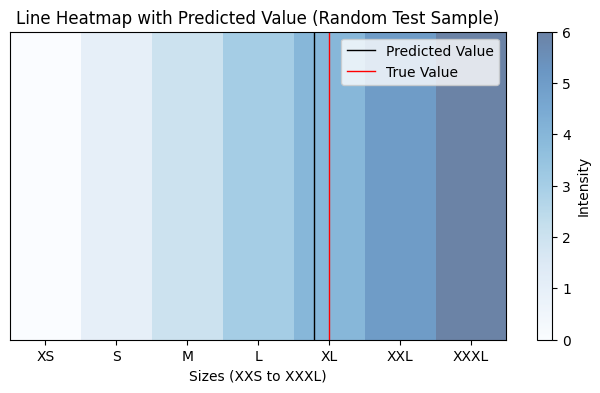

In [ ]:
#function to test the model
# Generate a random index from the test set
random_index = np.random.choice(len(X_test))

# Predicted value
predicted_value = model.predict(np.array([X_test.iloc[random_index]]))[0][0]
true_value = y_test.iloc[random_index]

# Create a colormap for the heatmap
cmap = plt.get_cmap('Blues')

# Plot the line heatmap
plt.figure(figsize=(8, 4))

# Add a heatmap background
heatmap = plt.imshow([np.arange(0, 7)], cmap=cmap, aspect='auto', extent=[sizes[0] - 0.5, sizes[-1] + 0.5, 0, 1], alpha=0.6)

# add the predicted value as a vertical line
plt.axvline(predicted_value, color='k', linestyle='-', linewidth=1)

# add the true value as a vertical line
plt.axvline(true_value, color='r', linestyle='-', linewidth=1)

# Customize the plot
plt.xticks(sizes, sizes_labels)
plt.yticks([])
plt.xlabel('Sizes (XXS to XXXL)')
plt.title('Line Heatmap with Predicted Value (Random Test Sample)')
plt.legend(['Predicted Value', 'True Value'])

# Show the colorbar for the heatmap
cbar = plt.colorbar(heatmap)
cbar.set_label('Intensity')

# Display the plot
plt.show()


In [ ]:
#testing the model with external data
# Function to calculate BMI
def calculate_bmi(weight, height):
    return weight / ((height / 100) ** 2)


In [ ]:
# Function to normalize user input
def normalize_input(user_input, scaler):
    normalized_input = scaler.transform(user_input.reshape(1, -1))
    return normalized_input


In [ ]:
# Function to predict size and provide recommendations using the TensorFlow model
def predict_size_and_recommend_tf(user_input, model, scaler, size_mapping):
    # Calculate BMI

    bmi = calculate_bmi(user_input[0], user_input[2])

    # Add BMI to user input
    user_input_with_bmi = np.append(user_input, bmi)


    # Normalize input
    normalized_input = normalize_input(user_input_with_bmi, scaler)


    # Predict size
    predicted_size = model.predict(normalized_input)[0][0]

    # Map predicted size to category
    for size, encoded_size in size_mapping.items():
        if encoded_size == round(predicted_size):
            predicted_size_category = size
            break
    else:
        # Handle the case when predicted size is not in the categories
        # Find the two sizes between which the predicted size falls
        sizes = list(size_mapping.keys())
        sizes.sort(key=lambda s: size_mapping[s])

        for i in range(len(sizes) - 1):
            if size_mapping[sizes[i]] < round(predicted_size) < size_mapping[sizes[i+1]]:
                recommended_sizes = [sizes[i], sizes[i+1]]
                break
        else:
            # Edge case if the predicted size is greater than the biggest size
            recommended_sizes = [sizes[5], sizes[6]]

        return f"The predicted size is not in the defined categories. Recommended sizes: {', '.join(recommended_sizes)}"

    return f"Predicted size: {predicted_size_category}"

# User input
age = float(input("Enter age: "))
weight = float(input("Enter weight (kg): "))
height = float(input("Enter height (cm): "))

# Create user input array
user_input = np.array([weight, age, height])

# Predict size and provide recommendations using the TensorFlow model
result_tf = predict_size_and_recommend_tf(user_input, model, scaler, size_mapping)

# Print the result
print(result_tf)


Enter age: 21
Enter weight (kg): 58
Enter height (cm): 175
1/1 [==============================] - 0s 22ms/step
Predicted size: M


In [ ]:
#Saving model for deployment

# Step 1: Convert the TensorFlow model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Step 2: Save the TFLite model to a file
with open('size_recommendation_tensorflow.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model has been converted to TFLite and saved as 'model.tflite'")


Model has been converted to TFLite and saved as 'model.tflite'


In [ ]:
import joblib

# Save the TensorFlow model to a pickle file
joblib.dump(model, 'tensorflow_model.pkl')


In [ ]:
import joblib

# Define the file path where you want to save the model
model_filename = "tensorflow_model.pkl"

# Save the model using joblib
joblib.dump(model, model_filename)



In [ ]:
import joblib
from google.colab import files

# Save the TensorFlow model to a pickle file
joblib.dump(model, 'tensorflow_model.pkl')

# Download the pickle file locally
files.download('tensorflow_model.pkl')